# **Récupération et formatage des données**
---


## Introduction<a class="anchor" id="partie1"></a>

Ce notebook contient les codes nécessaires à la récupération et au formatage des données. Les données ont été récupéré sur le site de [l'OCDE](https://data-explorer.oecd.org/) et sur celui [d'Eurostat](https://ec.europa.eu/eurostat/fr/data/database). 

Nous récupérons les données en csv et les transformons en un unique csv contenant pour chacun des pays les valeurs trimestrielles (de Q1 en 1995 à Q3 de 2024 <span style="color:red ; font-size:20px;"> faire attention les working hours ne vont qu'au Q3 de 2024 </span>) de PIB, d'heure de travail, des taux d'intérêts à court et long terme et de l'indice à la consommation des prix. Pour l'instant il nous manque aussi les anticipations des taux et les rendements des marchés financiers. Le csv final de ce notebook servira de base de données par la suite. 

<span style="color:red ; font-size:20px;"> Compléter avec les variables manquantes et mettre une liste des pays (si on ne la met pas ailleurs) </span>

## Sommaire

* [Introduction](#partie1)
* [Récupération des données](#partie2)
    * [Données de PIB](#partie21)
    * [Données d'heures de travail](#partie22)
    * [Données des taux d'intérêts](#partie23)


## Récupération des données <a class="anchor" id="partie2"></a>

In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np 
import pandas as pd

### Données de PIB <a class="anchor" id="partie21"></a>

Nous extrayons les données relatives au PIB depuis Eurostat


In [9]:
# Charge les données depuis le csv 
df_GDP = pd.read_csv("Données_extraites/GDP_trimestriel_eurostat.csv", encoding='utf-8')

# Sélectionne les colonnes nécessaires
df_GDP_selected = df_GDP[['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# Change le format avec les périodes en index et les noms des pays en noms de colonnes
df_GDP_pivot = df_GDP_selected.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

# Transforme le nom des colonnes en PIB_Nom_du_pays
df_GDP_pivot.columns = [f'PIB_{col}' for col in df_GDP_pivot.columns]
df_GDP_pivot.columns = [col.replace(" ", "_") for col in df_GDP_pivot.columns]

Evolution du PIB en France (1995-2024) 

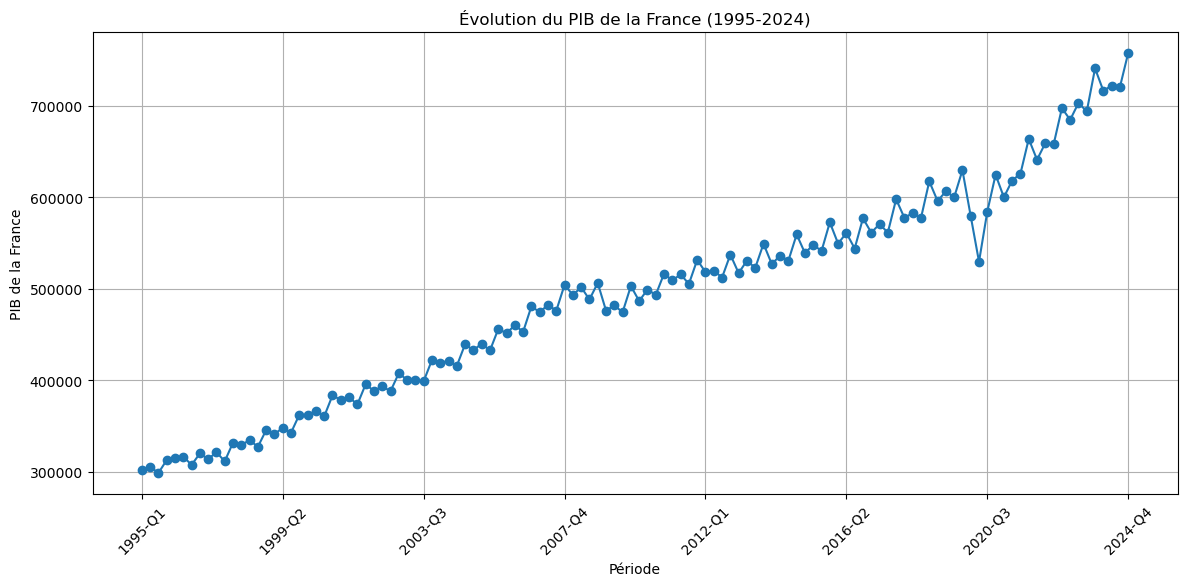

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Vérifier si la colonne PIB_France existe
if 'PIB_France' in df_GDP_pivot.columns:
    plt.figure(figsize=(14, 6))  # Augmente la taille du graphique

    plt.plot(df_GDP_pivot.index, df_GDP_pivot['PIB_France'], marker='o', linestyle='-')
    
    plt.xlabel("Période")
    plt.ylabel("PIB de la France")
    plt.title("Évolution du PIB de la France (1995-2024)")

    # Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
    num_ticks = 8  # Nombre de labels affichés sur l'axe X
    indices = np.linspace(0, len(df_GDP_pivot.index) - 1, num_ticks, dtype=int)  # Espacement des indices
    plt.xticks(df_GDP_pivot.index[indices], rotation=45)  # Appliquer les labels espacés

    plt.grid(True)
    plt.show()
else:
    print("La colonne 'PIB_France' n'existe pas. Vérifiez le nom des colonnes dans df_GDP_pivot.")


### Données de d'heure de travail <a class="anchor" id="partie22"></a>

Nous extrayons les données relatives aux heures de travail depuis Eurostat. Nous avons trois base de données pour les heures de travail. Une base annuelle de 1995 à 1997, et deux bases trimestrielles allant du Q1 de 1998 au Q4 de 2007 et du Q1 de 2008 au Q3 de 2024.

Nous voulons traiter les données dans l'ordre chronologique. Nous devons donc pour la première période récupérer les données annuelles et les transformer en trimestrielles, nous choisissons d'interpoler les données manquantes de manière linéaire en donnant la valeur annuelle au Q1. Pour cela nous avons besoin de traiter les données de 1998 à 2007 avant afin de pouvoir faire l'interpolation entre le Q1 de 1997 et celui de 1998.

Nous récupérons donc d'abord toutes les données


In [4]:
# Charge les données de 1995 à 1997 
df_working_hours_95_97 = pd.read_csv("Données_extraites/Working_hours_eurostat_1995-1997.csv", encoding='utf-8')

# Sélectionne les colonnes nécessaires
df_working_hours_95_97_selected = df_working_hours_95_97[['geo', 'TIME_PERIOD', 'OBS_VALUE']]

# Change le format avec les périodes en index et les noms des pays en noms de colonnes
df_working_hours_95_97_pivot = df_working_hours_95_97_selected.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

# Transforme le nom des colonnes en WH_Nom_du_pays
df_working_hours_95_97_pivot.columns = [f'WH_{col}' for col in df_working_hours_95_97_pivot.columns]
df_working_hours_95_97_pivot.columns = [col.replace(" ", "_") for col in df_working_hours_95_97_pivot.columns]

# Même processus pour celles de 1998 à 2007 et celles de 2008 à 2024
df_working_hours_98_07 = pd.read_csv("Données_extraites/Working_hours_eurostat_1998-2007.csv", encoding='utf-8')
df_working_hours_98_07_selected = df_working_hours_98_07[['geo', 'TIME_PERIOD', 'OBS_VALUE']]
df_working_hours_98_07_pivot = df_working_hours_98_07_selected.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')
df_working_hours_98_07_pivot.columns = [f'WH_{col}' for col in df_working_hours_98_07_pivot.columns]
df_working_hours_98_07_pivot.columns = [col.replace(" ", "_") for col in df_working_hours_98_07_pivot.columns]

df_working_hours_08_24 = pd.read_csv("Données_extraites/Working_hours_eurostat_2008-2024.csv", encoding='utf-8')
df_working_hours_08_24_selected = df_working_hours_08_24[['geo', 'TIME_PERIOD', 'OBS_VALUE']]
df_working_hours_08_24_pivot = df_working_hours_08_24_selected.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')
df_working_hours_08_24_pivot.columns = [f'WH_{col}' for col in df_working_hours_08_24_pivot.columns]
df_working_hours_08_24_pivot.columns = [col.replace(" ", "_") for col in df_working_hours_08_24_pivot.columns]



Et maintenant nous configurons l'interpolation. Pour clarifier le point précédent, l'interpolation est linéaire, donc va tracer une droite entre deux périodes avec une valeur présente et inférer une valeur aux périodes pour laquelle la valeur est manquante et qui se trouvent entre nos deux périodes. Comme nous faisons le choix de donner la valeur annuelle au Q1 il faut ajouter une valeur de 1998 pour pouvoir inférer les valeurs du Q2, Q3 et Q4 de 1997, ce que nous faisons donc en ajoutant le Q1 de 1998 à notre table

In [5]:
# Récupération du Q1 de 1998 et suppresion de la table pour éviter les doublons lors de la concaténation
Q1_1998 =  df_working_hours_98_07_pivot.loc[['1998-Q1']]
df_working_hours_98_07_pivot = df_working_hours_98_07_pivot.drop(index='1998-Q1', errors='ignore')

# On ajoute les trimestres vierges aux données de 1995 à 1998 pour ensuite les compléter par interpolation
new_index = []
values = []
for year in df_working_hours_95_97_pivot.index:
    # Ajouter Q1 pour chaque année (avec la valeur annuelle)
    new_index.append(f"{year}-Q1")
    values.append(df_working_hours_95_97_pivot.loc[year].values)
    
    # Ajouter Q2, Q3 et Q4 (lignes vides pour l'instant)
    for quarter in ['Q2', 'Q3', 'Q4']:
        new_index.append(f"{year}-{quarter}")
        values.append([None] * len(df_working_hours_95_97_pivot.columns))

# Création du dataframe avec les lignes vides
df_working_hours_95_97_pivot = pd.DataFrame(values, index=new_index, columns=df_working_hours_95_97_pivot.columns)
df_working_hours_95_97_pivot.index.name = 'TIME_PERIOD'

df_working_hours_95_97_pivot = pd.concat([df_working_hours_95_97_pivot, Q1_1998])

# Interpolation
df_working_hours_95_97_pivot = df_working_hours_95_97_pivot.interpolate(method='linear')

Maintenant nous procédons à la concaténation des données pour avoir un unique dataframe contenant les heures de travail trimestrielles de 1995 à 2024.

In [8]:
# Concaténation
df_working_hours = pd.concat(
    [df_working_hours_95_97_pivot, df_working_hours_98_07_pivot, df_working_hours_08_24_pivot], 
    axis=0
)

Evolution du nombres d'heures travaillées en France (1995-2024)

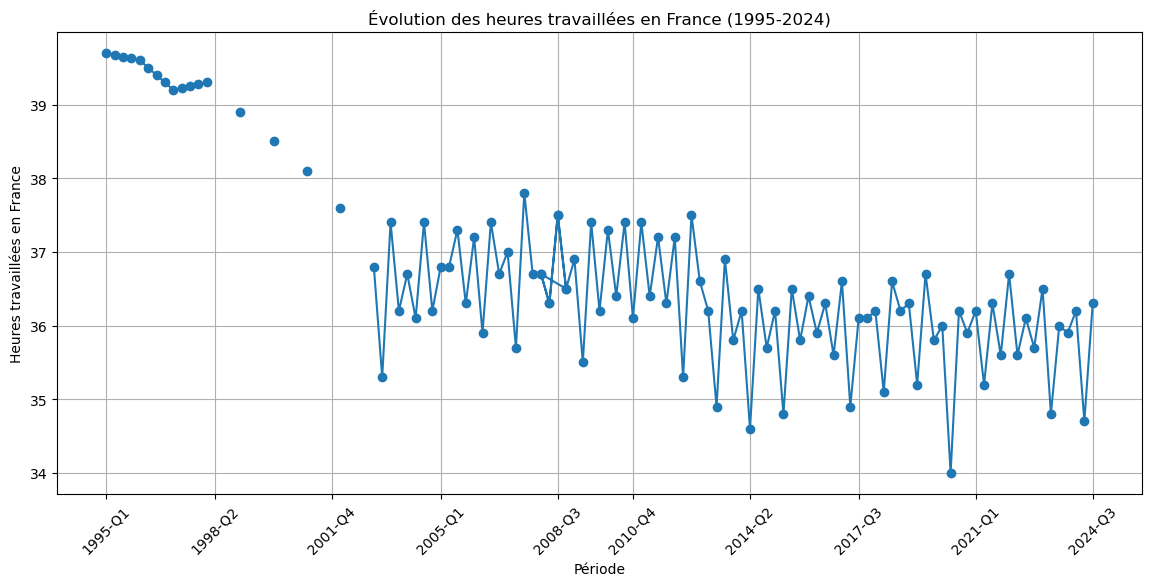

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Vérifier si la colonne pour la France existe
if 'WH_France' in df_working_hours.columns:
    plt.figure(figsize=(14, 6))  # Taille du graphique

    plt.plot(df_working_hours.index, df_working_hours['WH_France'], marker='o', linestyle='-')

    plt.xlabel("Période")
    plt.ylabel("Heures travaillées en France")
    plt.title("Évolution des heures travaillées en France (1995-2024)")

    # Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
    num_ticks = 10  # Nombre de labels affichés sur l'axe X
    indices = np.linspace(0, len(df_working_hours.index) - 1, num_ticks, dtype=int)  # Espacement des indices
    plt.xticks(df_working_hours.index[indices], rotation=45)  # Appliquer les labels espacés

    plt.grid(True)
    plt.show()
else:
    print("La colonne 'FR' n'existe pas. Vérifiez le nom des colonnes dans df_working_hours.")


### Données des taux d'intérêts <a class="anchor" id="partie23"></a>

Pour les taux d'intérêts nous récupérons des taux de court-terme, 